### EDA

En este notebook, realizaremos un Análisis Exploratorio de Datos (EDA) de varios conjuntos de datos relacionados con los videojuegos en la plataforma Steam. Los conjuntos de datos incluyen información sobre los juegos, las reseñas de los usuarios, los elementos de los juegos y las recomendaciones. El objetivo de este EDA es entender las características y estructuras de nuestros datos, identificar posibles problemas y anomalías, y descubrir patrones y relaciones que puedan ser útiles para futuros análisis y modelado.

In [20]:
# Importamos las librerias 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Importamos los dataframes
df1 = pd.read_parquet('consulta1.parquet')
games = pd.read_parquet('games.parquet')
reviews = pd.read_parquet('reviews.parquet')
items = pd.read_parquet('items.parquet')
recomendacion = pd.read_parquet('recomendacion.parquet')

### Géneros más populares en términos de tiempo total de juego.

C:\Users\pauda\AppData\Local\Temp\ipykernel_27712\1454473695.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='playtime_forever', y='genre', data=genre_playtime,  palette='Set2')


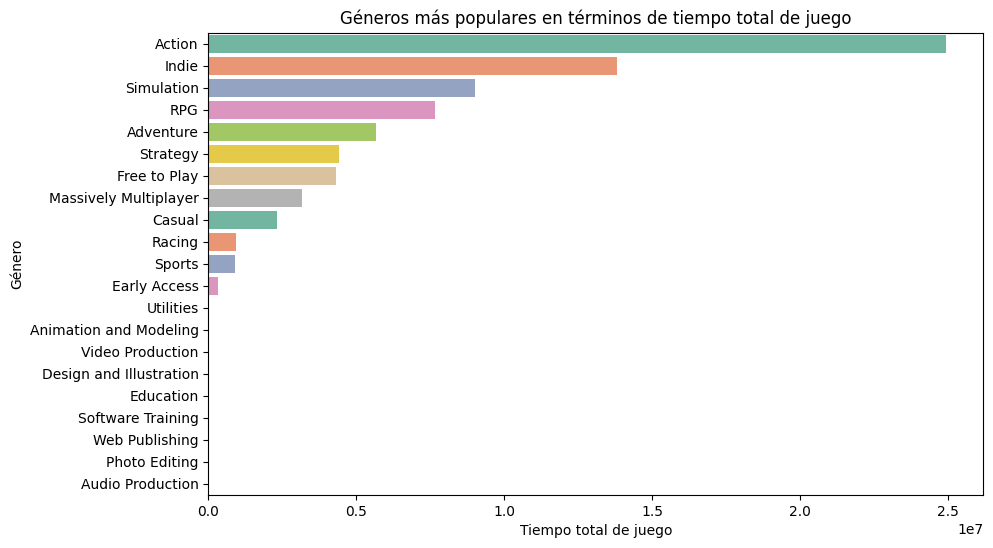

In [46]:
# Unir los dataframes
merged_df = pd.merge(games, items, left_on='content_id', right_on='item_id')

# Agrupar por género y sumar el tiempo de juego
genre_playtime = merged_df.groupby('genre')['playtime_forever'].sum().reset_index()

# Ordenar los datos por tiempo de juego
genre_playtime = genre_playtime.sort_values('playtime_forever', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='playtime_forever', y='genre', data=genre_playtime,  palette='Set2')
plt.xlabel('Tiempo total de juego')
plt.ylabel('Género')
plt.title('Géneros más populares en términos de tiempo total de juego')
plt.show()

Los géneros de juegos como Action, Indie, Simulation y RPG son extremadamente populares en términos de tiempo total de juego, reflejando una mayor inversión de tiempo por parte de los jugadores. Los géneros menos populares en términos de tiempo total tienden a ser más específicos o de nicho, y algunas categorías reflejan software no orientado al entretenimiento.

### Gráfico de dispersión del tiempo de juego vs. género

C:\Users\pauda\AppData\Local\Temp\ipykernel_27712\2312496443.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='genre', y='playtime_forever', data=filtered_df, palette='Set2')


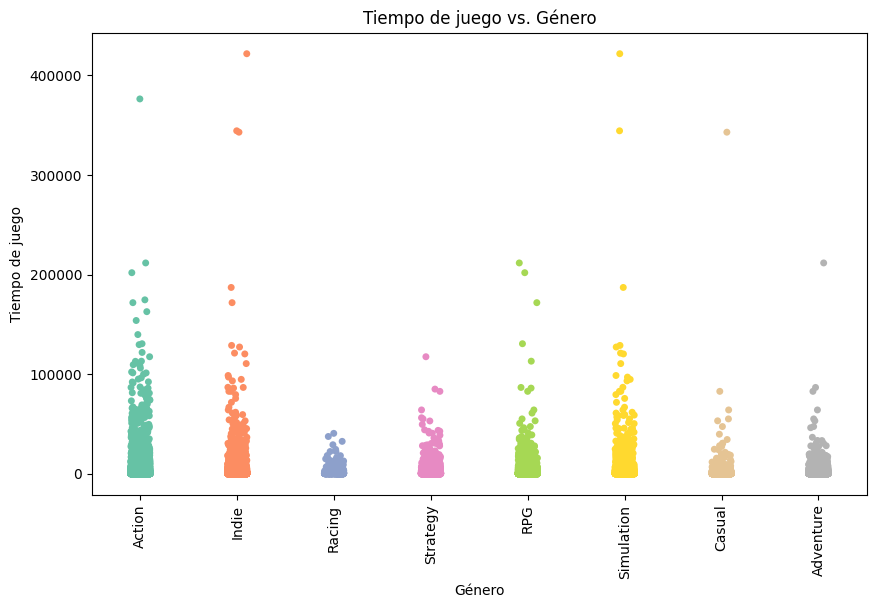

In [47]:
# Crear una lista de los géneros que quieres incluir
selected_genres = ['Sport', 'Racing', 'Casual', 'Massively Multipayer', 'Strategy','Adventure', 'RPG', 'Simulation', 'Indie', 'Action']

# Filtrar el dataframe
filtered_df = merged_df[merged_df['genre'].isin(selected_genres)]

plt.figure(figsize=(10, 6))
sns.stripplot(x='genre', y='playtime_forever', data=filtered_df, palette='Set2')
plt.xlabel('Género')
plt.ylabel('Tiempo de juego')
plt.title('Tiempo de juego vs. Género')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.show()

Patrones y Tendencias:

Los géneros de juegos como Action, Indie, RPG y Simulation tienden a tener jugadores con tiempos de juego muy altos.
Racing y Adventure parecen tener jugadores con tiempos de juego generalmente más bajos.
Casual y Strategy tienen una dispersión intermedia.

Outliers:

Existen outliers significativos en géneros como Action, Indie, RPG, y Simulation, lo que sugiere que pueden haber errores de medición en estos puntos o algunos jugadores dedican una cantidad excesiva de tiempo a estos géneros.

Comparación de Dispersión:
Los géneros con mayor dispersión (Action, Indie, RPG, Simulation) presentan mayor variabilidad en los hábitos de juego de los jugadores.
Los géneros con menor dispersión (Racing, Adventure) indican que los tiempos de juego de los jugadores son más uniformes.

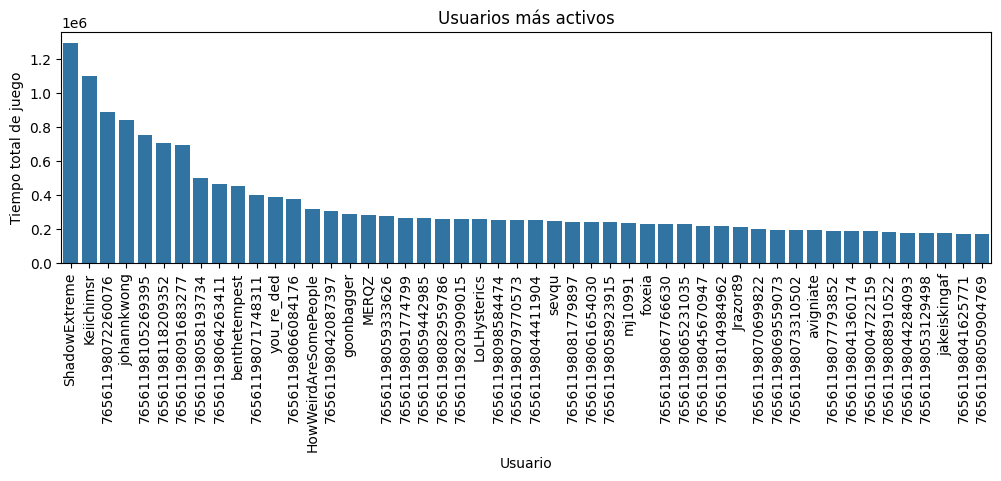

In [62]:
user_playtime = merged_df.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)

# Seleccionar los primeros 10 usuarios
top_users = user_playtime.head(50)

# Crear el gráfico de barras
plt.figure(figsize=(12, 3))
sns.barplot(x=top_users.index, y=top_users.values)
plt.xlabel('Usuario')
plt.ylabel('Tiempo total de juego')
plt.title('Usuarios más activos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.show()

### Características Single-player y Multi-player por género 

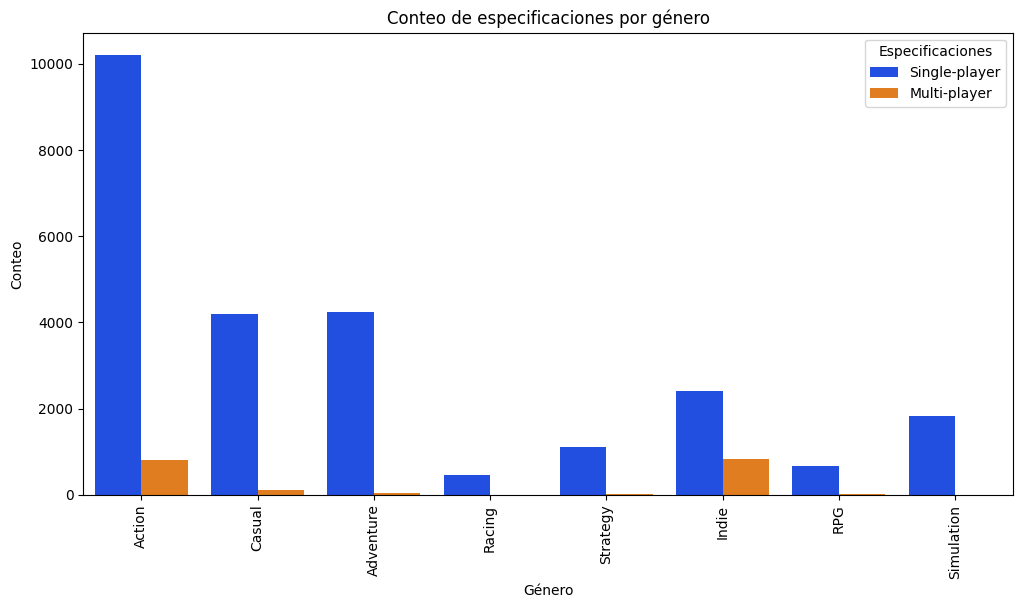

In [89]:
generos_seleccionados =  ['Sport', 'Racing', 'Casual', 'Massively Multipayer', 'Strategy','Adventure', 'RPG', 'Simulation', 'Indie', 'Action']
recomendacion_filtrada = recomendacion[recomendacion['genre'].isin(generos_seleccionados)]

specs_seleccionadas = ['Single-player', 'Multi-player']
recomendacion_filtrada = recomendacion_filtrada[recomendacion_filtrada['specs'].isin(specs_seleccionadas)]

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', hue='specs', data=recomendacion_filtrada, palette= 'bright')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.title('Conteo de especificaciones por género')
plt.xticks(rotation=90)
plt.legend(title='Especificaciones')
plt.show()

### PRECIO

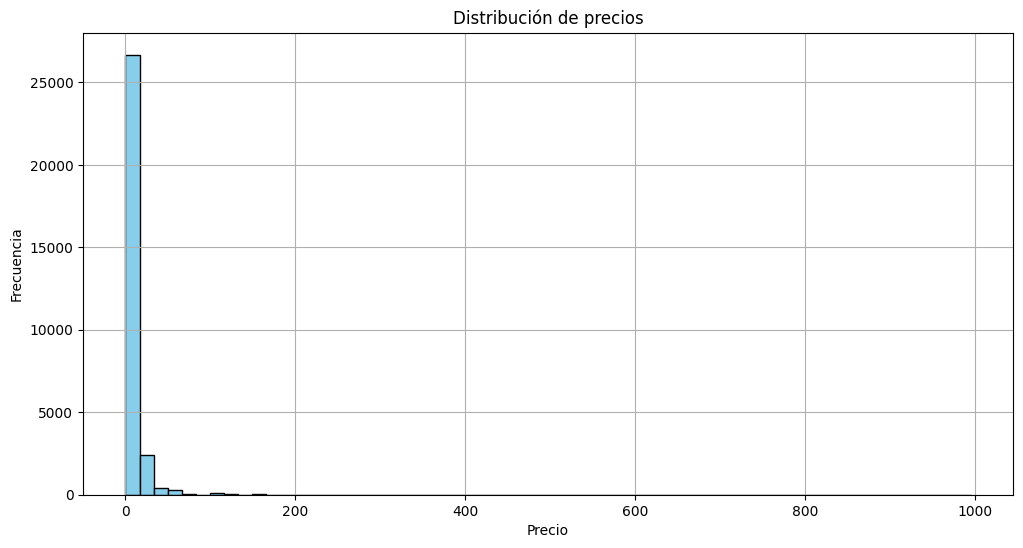

In [88]:
plt.figure(figsize=(12, 6))
plt.hist(games['price'], bins=60, color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios')
plt.grid(True)
plt.show()

Al haber outliers (juegos que valen hasta 1000) no se logra visualizar bien la distribucion de los precios, haremos un zoom para poder eliminar los outliers de la visualizacion.

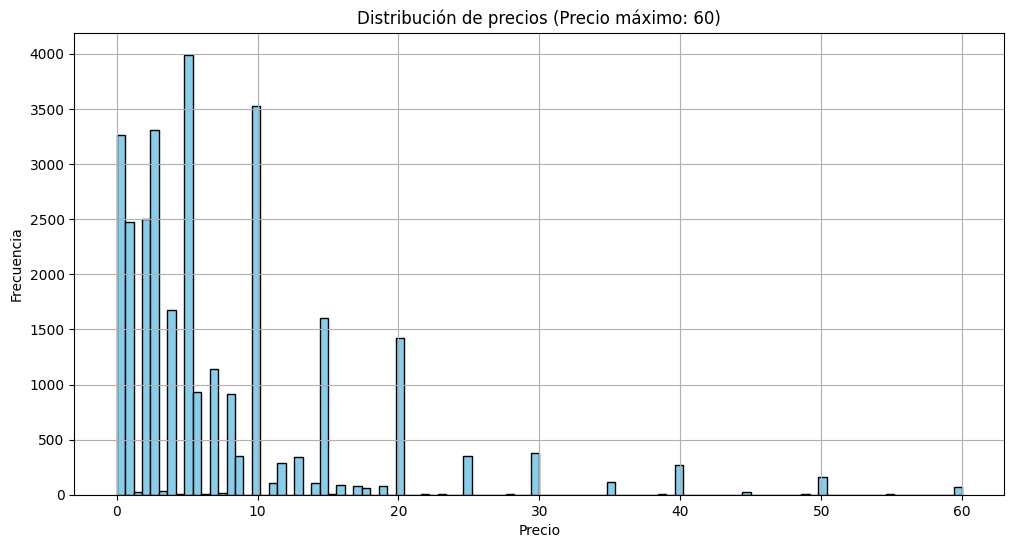

In [87]:
df_filtered = games[games['price'] <= 60]

# Crear el gráfico de distribución de datos
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['price'], bins=100, range=(0, 60), color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios (Precio máximo: 60)')
plt.grid(True)
plt.show()

Vemos que la mayoría de los juegos tienen un precio inferior a 20 y  la gran mayoría osila entre 0 y 10

### TOP 10 
Top 10 de años con mas desarrollos de videojuegos

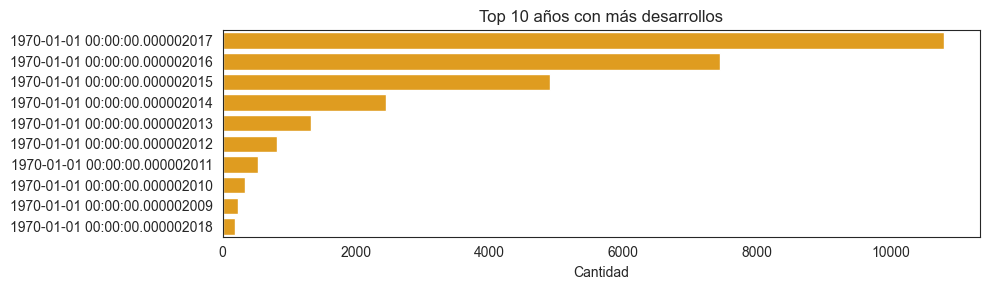

In [108]:
top_years = games['release_date'].value_counts().nlargest(10).index
top_years = games[games['release_date'].isin(top_years)]
order = top_years['release_date'].value_counts().index

plt.figure(figsize=(10, 3))
# Crear el gráfico
sns.countplot(data=top_years, y='release_date', order= order,color='orange')
plt.title('Top 10 años con más desarrollos')
plt.xlabel('Cantidad')
plt.ylabel('')
plt.tight_layout()
plt.show()

Top 10 de desarrolladores con más videjuegos desarrollados

C:\Users\pauda\AppData\Local\Temp\ipykernel_27712\1979014415.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_devs.values, y=top_devs.index, palette='viridis')


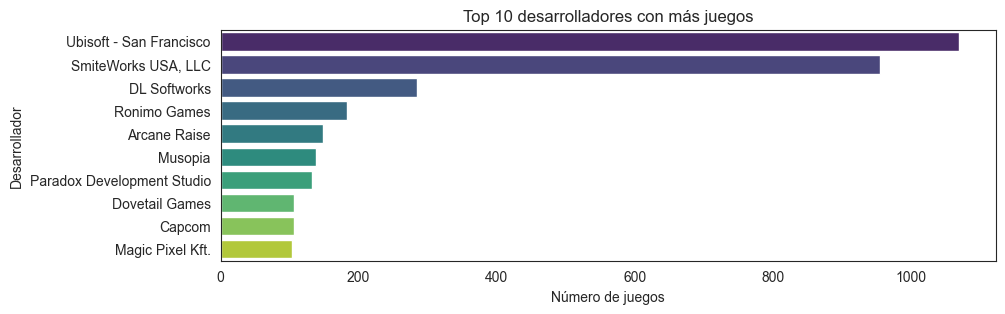

In [111]:
# Contar el número de juegos por desarrollador
dev_counts = games['developer'].value_counts()

# Seleccionar los 10 desarrolladores con más juegos
top_devs = dev_counts.nlargest(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 3))
sns.barplot(x=top_devs.values, y=top_devs.index, palette='viridis')
plt.xlabel('Número de juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 desarrolladores con más juegos')
plt.show()

Deberíamos investigar si el caso de Ubisoft y DmiteWorks USA son casos en los que se están manejando outliers o si realmente son empresas muy grandes que tienen esa capacidad de producción

### REVIEWS

C:\Users\pauda\AppData\Local\Temp\ipykernel_27712\3286125859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.index, y=frecuencias.values, palette='bright')


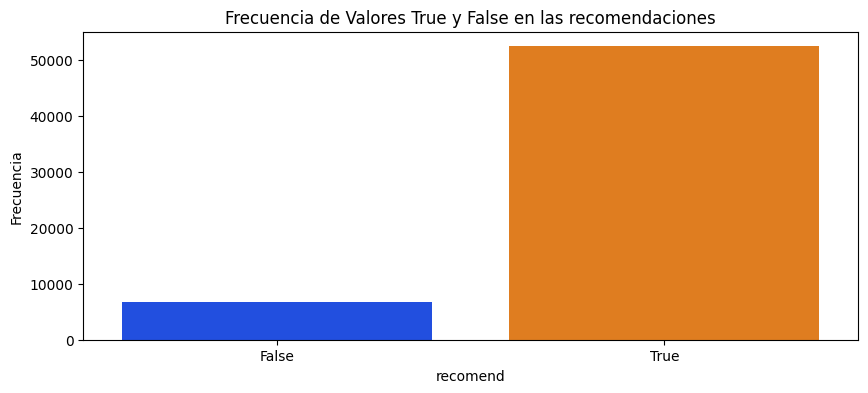

In [86]:
frecuencias = reviews['recomend'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
sns.barplot(x=frecuencias.index, y=frecuencias.values, palette='bright')
plt.xlabel('recomend')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores True y False en las recomendaciones')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])  # Asegurar que los ejes estén etiquetados correctamente
plt.show()

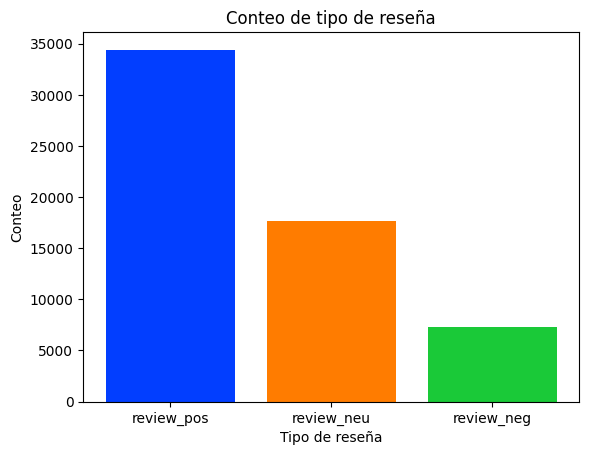

In [97]:
review_pos_count = reviews['review_pos'].sum()
review_neu_count = reviews['review_neu'].sum()
review_neg_count = reviews['review_neg'].sum()

# Creao una lista con los conteos
counts = [review_pos_count, review_neu_count, review_neg_count]

# Creao una lista con los nombres de las columnas
labels = ['review_pos', 'review_neu', 'review_neg']

palette = sns.color_palette("bright", len(labels))

#Grafico
plt.bar(labels, counts, color=palette)
plt.xlabel('Tipo de reseña')
plt.ylabel('Conteo')
plt.title('Conteo de tipo de reseña')
plt.show()